In [1]:
%load_ext autoreload
%autoreload 2

This follows the setup of ppd_y1_data.ipynb, but there are some different configurations.  This particular notebook has locations set to the Ohio Supercomputer (and some things like the sys.path.append call below are unnecessary if you are in the `ppd/postprocessing directory`).

In [2]:
import sys
#sys.path.append("/users/PCON0003/cond0080/src/y3-3x2pt-ppd/postprocessing")
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits

In [3]:
path_ppd = '../'
# path_chain = '../../trimmed_chains/'
path_chain = '/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/'
path_dv = '../../../data/des-y3/'

DATAFILE = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

fiducial_dv = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

In [4]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 2x2 goodness of fit

In [6]:
RUN_NAME = 'magnification_maglim_2x2pt_lcdm_freemag'
RUN_NAME_PPD = 'magnification_maglim_2x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_magnification_maglim_2x2pt_lcdm_freemag.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--bias_6', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'lens_photoz_er


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_magnification_maglim_2x2pt_lcdm_freemag.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 

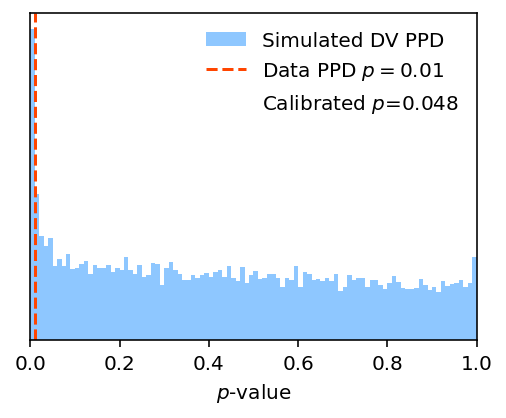

In [35]:
pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['gammat','wtheta'],
    data_sets_dprime=['gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    #pvals_subsets=res[0],
    pvals_subsets=pvals_subsets,
    get_zbin_pair_pcal=False,
    get_zbin_pcal=True,
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)

)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

In [25]:
a = np.zeros(3,dtype=np.complex128)

In [31]:
np.complex128

numpy.complex128

In [29]:
np.iscomplexobj(a)

True

Using DV.fits covariance for chi2


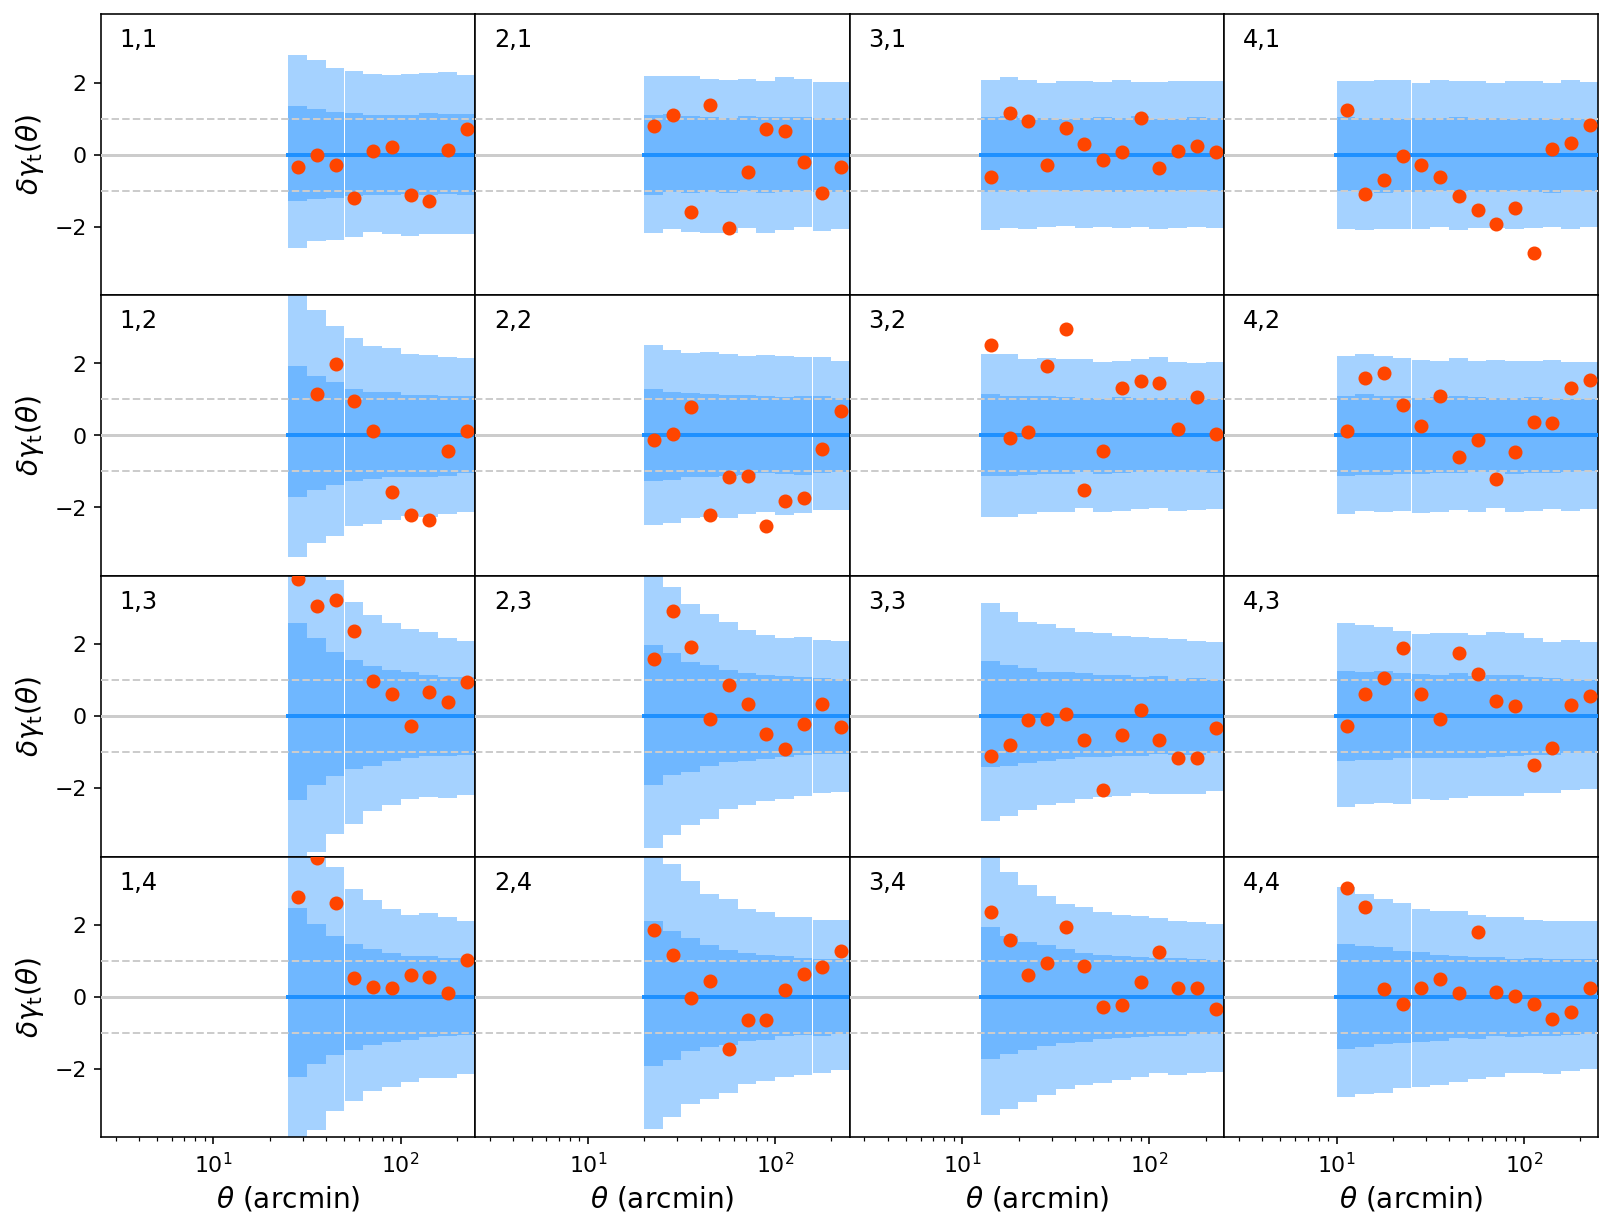

Using DV.fits covariance for chi2


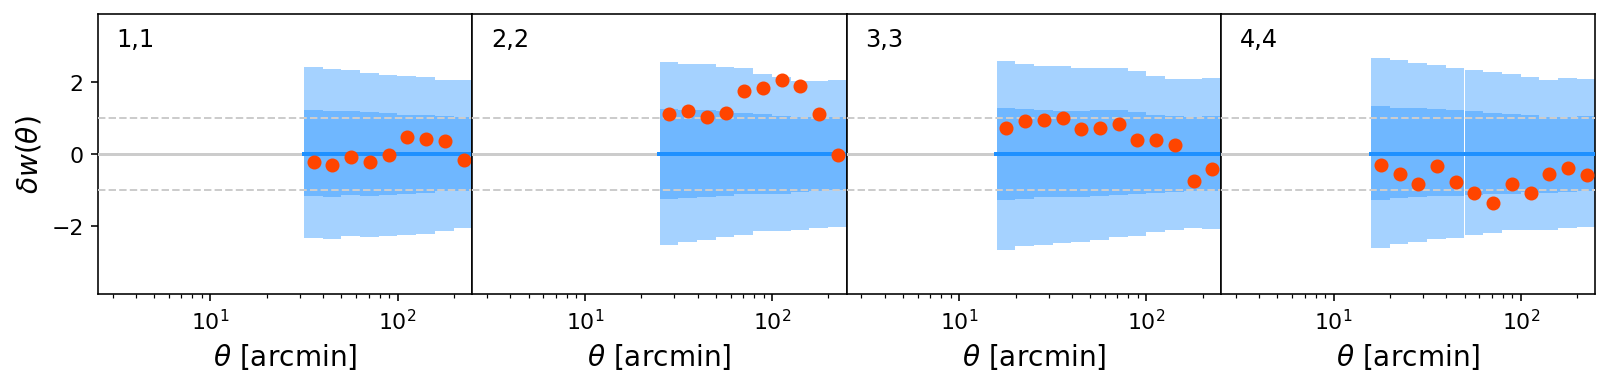

In [15]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


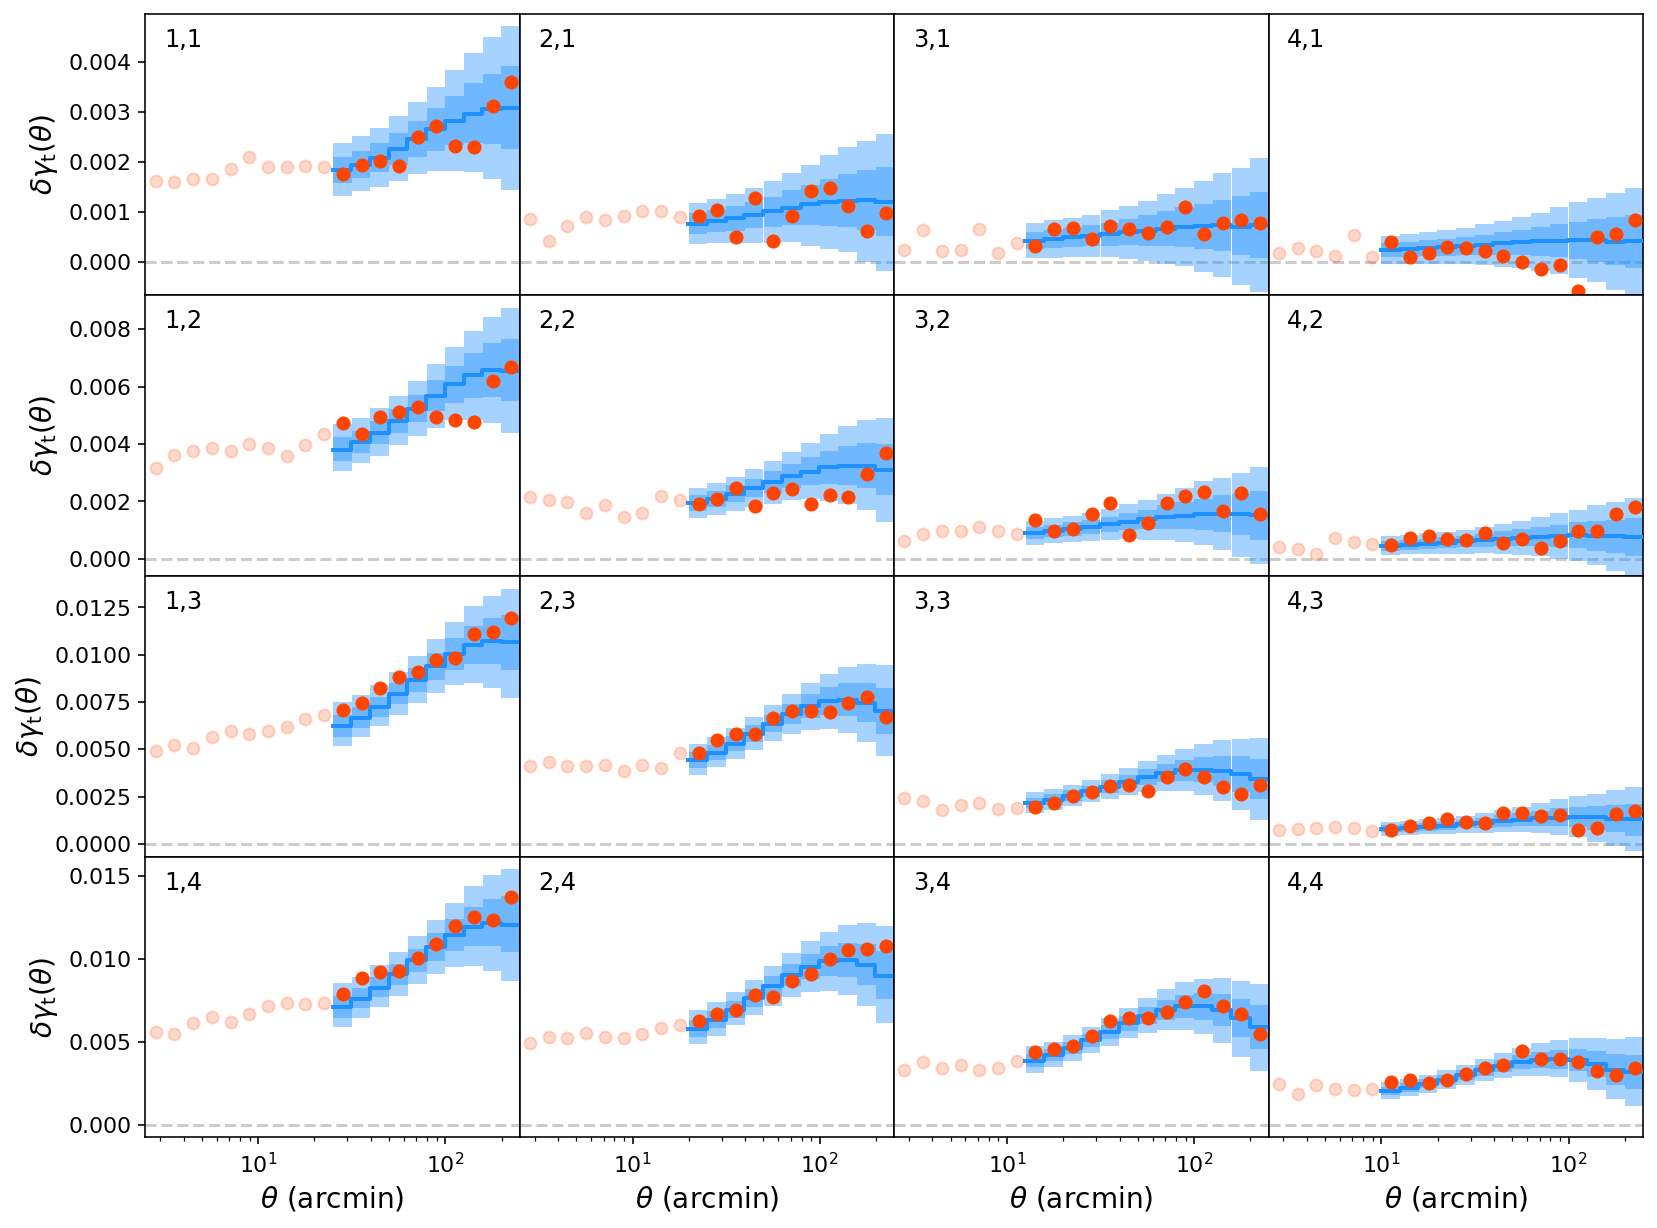

Using DV.fits covariance for chi2


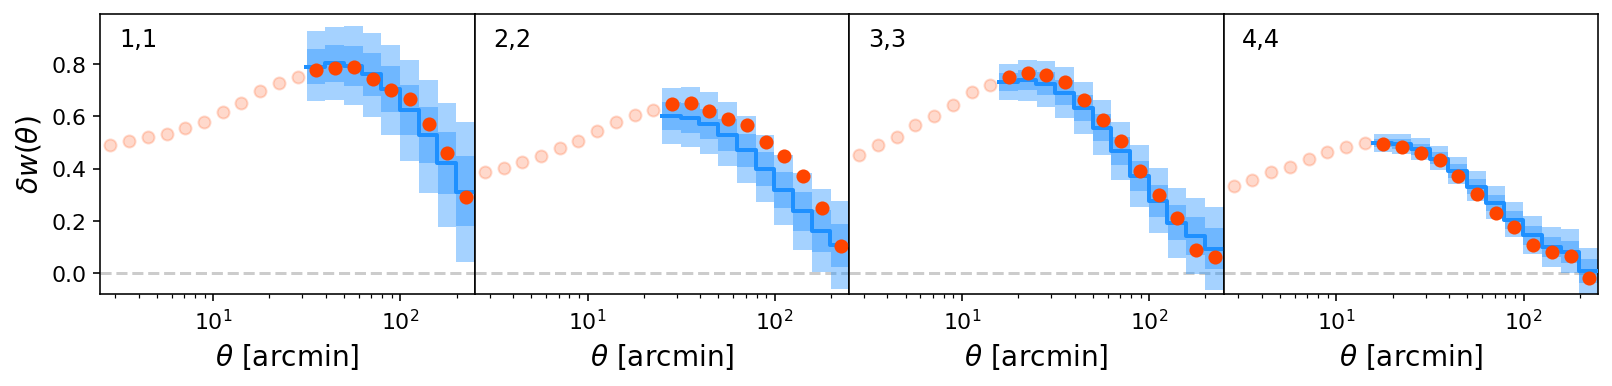

In [16]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 4, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 4, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)